In [15]:
import sys
sys.path.insert(0,'../sib/')
import sib
import csv
import os
import numpy as np
import pandas as pd
import sklearn.metrics as mm
import sys
# sir_inference imports
from sir_model import FastProximityModel, patient_zeros_states
from ranking import csr_to_list
import os.path
from os import path
N=2000
#N=50000
## new try with 100 spreaders
N_patient_zero = 12;
#N_patient_zero = 5;
lamb = 0.05;
mu = 0.02;
scale=1.0; # Easy Case
T=100;
seeds=[5]
#seed=int();

In [16]:
Path("loc").mkdir

<bound method Path.mkdir of PosixPath('loc')>

In [17]:
from pathlib import Path

Generate network with N=2000 T=100 scale=1.0 default lambda=0.05 seed=5...
Generating transmissions
t = 0 / 100
t = 2 / 100
t = 4 / 100
t = 6 / 100
t = 8 / 100
t = 10 / 100
t = 12 / 100
t = 14 / 100
t = 16 / 100
t = 18 / 100
t = 20 / 100
t = 22 / 100
t = 24 / 100
t = 26 / 100
t = 28 / 100
t = 30 / 100
t = 32 / 100
t = 34 / 100
t = 36 / 100
t = 38 / 100
t = 40 / 100
t = 42 / 100
t = 44 / 100
t = 46 / 100
t = 48 / 100
t = 50 / 100
t = 52 / 100
t = 54 / 100
t = 56 / 100
t = 58 / 100
t = 60 / 100
t = 62 / 100
t = 64 / 100
t = 66 / 100
t = 68 / 100
t = 70 / 100
t = 72 / 100
t = 74 / 100
t = 76 / 100
t = 78 / 100
t = 80 / 100
t = 82 / 100
t = 84 / 100
t = 86 / 100
t = 88 / 100
t = 90 / 100
t = 92 / 100
t = 94 / 100
t = 96 / 100
t = 98 / 100
Running SIR simulation
t = 0 / 100
t = 2 / 100
t = 4 / 100
t = 6 / 100
t = 8 / 100
t = 10 / 100
t = 12 / 100
t = 14 / 100
t = 16 / 100
t = 18 / 100
t = 20 / 100
t = 22 / 100
t = 24 / 100
t = 26 / 100
t = 28 / 100
t = 30 / 100
t = 32 / 100
t = 34 / 100
t =

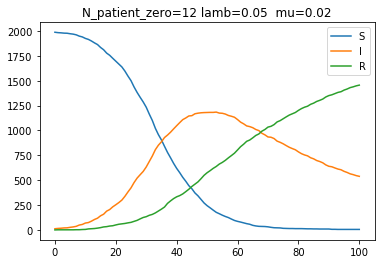

In [46]:
for seed in seeds:
    print("Generate network with N=%d T=%d scale=%.1f default lambda=%.2f seed=%d..."%(N,T,scale,lamb,seed), flush=True)
    initial_states = patient_zeros_states(N, N_patient_zero)
    model = FastProximityModel(N, scale, mu, lamb, initial_states)
    location="networks"
    folder=Path(location)
    if not folder.exists():
        folder.mkdir()
    
    model.run(T=T, print_every=2)
    model.get_counts().plot(
         title=f"N_patient_zero={N_patient_zero} lamb={lamb:.2f}  mu={mu:.2f}"
    );
    

    print("Saving transmissions...", flush=True)
    logfile="interactions_proximity_N%dK_s%.1f_T%d_lamb%.2f_s%d.csv"%(N/1000,scale,T,lamb,seed)
    #with open(location+"/"+logfile, 'w', newline='') as csvfile:
    datafr=[]
    for t, A in enumerate(model.transmissions):
        ct = ranking.csr_to_dataframe(model.transmissions[t], columns=["i","j","lamb"])
        ct["t"]=t
        datafr.append(ct)
    cts_out = pd.concat(datafr, ignore_index=True)[["t","i","j","lamb"]]
    cts_out.to_csv(location+"/"+logfile)
        
    print("Bye-Bye")

In [53]:
cts_out.to_parquet("contacts_proximity_N{:d}K_s{:.1f}_T{:d}_lamb{}_s{:d}.pq".format(round(N/1000)
                                                                        ,scale,T,lamb,seed),
                   index=False,
                  compression="gzip")